In [1]:
import sklearn 

In [2]:
import os
datapath = os.path.join('datasets', 'lifesat', '') # 다운로드 파일을 저장하는 경로
datapath

'datasets\\lifesat\\'

In [6]:
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
os.makedirs(datapath, exist_ok = True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url=DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

In [10]:
import matplotlib as mpl
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

oecd_bli = pd.read_csv(datapath + 'oecd_bli_2015.csv', thousands=',')
oecd_bli.head(5)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [21]:
gdp_per_capita = pd.read_csv(datapath + 'gdp_per_capita.csv', thousands = ',', delimiter = '\t',
                             encoding = 'latin1', na_values = 'n/a') # na_values는 nan을 다른 값으로 저장
gdp_per_capita.head(3)

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0


In [23]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY'] == 'TOT']
oecd_bli.head(3)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN


In [26]:
oecd_bli = oecd_bli.pivot(index = 'Country', columns = 'Indicator', values = 'Value')
oecd_bli

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,1.59,22101.0,86.0,1.2,59.0,436.0,14.41,49.0,73.0,16.5
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,3.12,20338.0,85.0,1.4,60.0,500.0,14.98,59.0,85.0,18.1
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,1.78,48347.0,95.0,1.9,72.0,498.0,16.06,88.0,94.0,19.4
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,3.82,18944.0,89.0,1.5,54.0,526.0,14.90,64.0,79.0,17.5


In [27]:
gdp_per_capita.rename(columns = {'2015': 'GDP per capita'}, inplace = True)
gdp_per_capita

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...,...
185,Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
186,Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
187,Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0
188,Zimbabwe,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1064.350,2012.0


In [28]:
gdp_per_capita.set_index('Country', inplace = True)
gdp_per_capita

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0
...,...,...,...,...,...,...
Vietnam,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",2088.344,2012.0
Yemen,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1302.940,2008.0
Zambia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",1350.151,2010.0


In [36]:
full_country_stats = pd.merge(left = oecd_bli, right = gdp_per_capita, left_index = True,
                              right_index = True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,14.41,93.0,91.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.865,2014.0
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,14.46,75.0,94.0,17.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.031,2015.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,15.71,89.0,87.0,18.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",40106.632,2014.0
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,14.25,61.0,91.0,17.2,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43331.961,2015.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0
Denmark,15.0,3.9,7.0,0.9,78.0,2.03,73.0,0.3,26491.0,44488.0,...,16.06,88.0,94.0,19.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",52114.165,2015.0
Estonia,9.0,5.5,3.3,8.1,90.0,3.30,68.0,4.8,15167.0,7680.0,...,14.90,64.0,79.0,17.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17288.083,2014.0


In [38]:
full_country_stats.sort_values(by = 'GDP per capita', inplace = True)
full_country_stats

,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,14.97,79.0,72.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8669.998,2014.0
Mexico,30.0,12.8,9.0,4.2,37.0,28.83,61.0,23.4,13085.0,9056.0,...,13.89,63.0,67.0,14.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.280,2015.0
Russia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,...,14.97,65.0,56.0,16.0,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.914,2015.0
Turkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,...,13.42,88.0,62.0,16.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.372,2013.0
Hungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,...,15.04,62.0,77.0,17.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.894,2015.0
Poland,33.0,1.4,10.8,3.2,90.0,7.41,60.0,0.9,17852.0,10919.0,...,14.20,55.0,79.0,18.4,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.334,2014.0
Chile,46.0,6.9,2.0,9.4,57.0,15.42,62.0,4.4,14533.0,17733.0,...,14.41,49.0,73.0,16.5,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.905,2014.0
Slovak Republic,13.0,3.0,6.6,0.6,92.0,7.02,60.0,1.2,17503.0,8663.0,...,14.99,59.0,81.0,16.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",15991.736,2015.0
Czech Republic,16.0,2.8,6.8,0.9,92.0,6.98,68.0,0.8,18404.0,17299.0,...,14.98,59.0,85.0,18.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",17256.918,2015.0


In [39]:
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))
keep_indices

[2,
 3,
 4,
 5,
 7,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32]

In [40]:
country_stats = full_country_stats[['GDP per capita', 'Life satisfaction']].iloc[keep_indices]
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [41]:
y = np.c_[country_stats['Life satisfaction']] # 삶의 만족도
y

array([[6. ],
       [5.6],
       [4.9],
       [5.8],
       [6.1],
       [5.6],
       [4.8],
       [5.1],
       [5.7],
       [6.5],
       [5.8],
       [6. ],
       [5.9],
       [7.4],
       [7.3],
       [6.5],
       [6.9],
       [7. ],
       [7.4],
       [7.3],
       [7.3],
       [6.9],
       [6.8],
       [7.2],
       [7.5],
       [7.3],
       [7. ],
       [7.5],
       [7.2]])

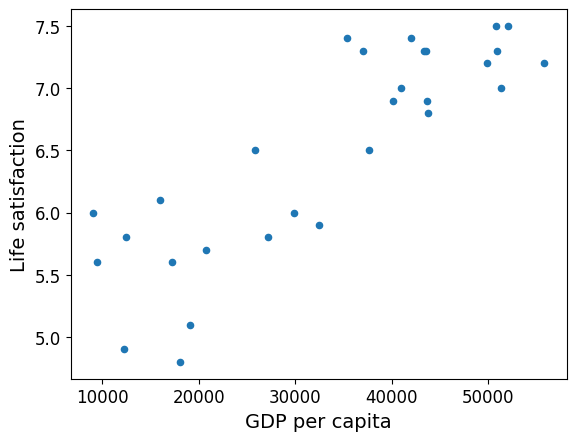

In [42]:
country_stats.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction')


In [43]:
X = np.c_[country_stats['GDP per capita']]
X

array([[ 9054.914],
       [ 9437.372],
       [12239.894],
       [12495.334],
       [15991.736],
       [17288.083],
       [18064.288],
       [19121.592],
       [20732.482],
       [25864.721],
       [27195.197],
       [29866.581],
       [32485.545],
       [35343.336],
       [37044.891],
       [37675.006],
       [40106.632],
       [40996.511],
       [41973.988],
       [43331.961],
       [43603.115],
       [43724.031],
       [43770.688],
       [49866.266],
       [50854.583],
       [50961.865],
       [51350.744],
       [52114.165],
       [55805.204]])

In [44]:
# 지도학습은 학습할 데이터와 정답 필수
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
X_new = [[22587]]

print(model.predict(X_new))

[[5.96242338]]


## 테스트와 검증

- CRIM: 범죄율
- INDUS: 비소매상업지역 면적 비율
- NOX: 일산화질소 농도
- RM: 주택당 방 수
- LSTAT: 인구 중 하위 계층 비율
- B: 인구 중 흑인 비율
- PTRATIO: 학생/교사 비율
- ZN: 25,000 평방피트를 초과 거주지역 비율
- CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
- AGE: 1940년 이전에 건축된 주택의 비율
- RAD: 방사형 고속도로까지의 거리
- DIS: 직업센터의 거리
- TAX: 재산세율

In [48]:
import pandas as pd

df = pd.read_csv('../AI데이터/boston_house.csv')
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [50]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size = 0.3, random_state = 0)
df_train.shape, df_test.shape

((354, 14), (152, 14))

In [51]:
df_train.head(10)

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
141,100.0,396.90,5.019,1.62864,1.4394,21.89,34.41,0.624,21.2,4,0.0,437,0,14.4
272,58.7,394.96,6.538,0.11460,3.9175,6.96,7.73,0.464,18.6,3,20.0,223,0,24.4
135,98.2,394.67,6.335,0.55778,2.1107,21.89,16.96,0.624,21.2,4,0.0,437,0,18.1
298,20.1,368.24,6.345,0.06466,7.8278,2.24,4.97,0.400,14.8,5,70.0,358,0,22.5
122,92.9,378.09,5.961,0.09299,2.0869,25.65,17.93,0.581,19.1,2,0.0,188,0,20.5
22,91.7,396.90,6.142,1.23247,3.9769,8.14,18.72,0.538,21.0,4,0.0,307,0,15.2
68,36.8,396.90,5.594,0.13554,6.4980,6.07,13.09,0.409,18.9,4,12.5,345,0,17.4
20,98.1,376.57,5.570,1.25179,3.7979,8.14,21.02,0.538,21.0,4,0.0,307,0,13.6
437,100.0,9.32,6.152,15.17720,1.9142,18.10,26.45,0.740,20.2,24,0.0,666,0,8.7
14,84.5,380.02,6.096,0.63796,4.4619,8.14,10.26,0.538,21.0,4,0.0,307,0,18.2


In [54]:
dfX = df.drop(['Target'], axis = 1)
dfX.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0


In [55]:
dfy = df[['Target']]
dfy.head()

,Target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [56]:
dfX_train, dfX_test, dfy_train, dfy_test = train_test_split(dfX, dfy, test_size = 0.3,
                                                            random_state = 0)
dfX_train.shape, dfX_test.shape, dfy_train.shape, dfy_test.shape

((354, 13), (152, 13), (354, 1), (152, 1))

In [59]:
from sklearn.model_selection import KFold
# statsmodels: 통계적 모델링, 통계 테스트, 데이터 탐색 및 시각화를 지원하는 라이브러리
import statsmodels.api as sm
import numpy as np

scores = np.zeros(5)
scores

array([0., 0., 0., 0., 0.])

In [60]:
cv = KFold(5, shuffle = True, random_state = 0)
cv

KFold(n_splits=5, random_state=0, shuffle=True)

In [61]:
feature_names = df.columns[:-1]
print(feature_names)

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS'],
      dtype='object')


In [64]:
for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]

    model = sm.OLS.from_formula("Target~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test)
    rss = ((df_test.Target - pred) ** 2).sum() # RSS(residual sum of squares)
    tss = ((df_test.Target - df_test.Target.mean()) ** 2).sum() # TSS(total sum of squares)
    rsquared = 1 - rss / tss # 결정계수

    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}.".format(result.rsquared, rsquared))

학습 R2 = 0.77301356, 검증 R2 = 0.58922238.
학습 R2 = 0.72917058, 검증 R2 = 0.77799144.
학습 R2 = 0.74897081, 검증 R2 = 0.66791979.
학습 R2 = 0.75658611, 검증 R2 = 0.66801630.
학습 R2 = 0.70497483, 검증 R2 = 0.83953317.


In [66]:
from sklearn.metrics import r2_score # 결정계수를 구하는 함수

for i, (idx_train, idx_test) in enumerate(cv.split(df)):
    df_train = df.iloc[idx_train]
    df_test = df.iloc[idx_test]

    model = sm.OLS.from_formula("Target~" + "+".join(feature_names), data=df_train)
    result = model.fit()

    pred = result.predict(df_test)
    # rss = ((df_test.Target - pred) ** 2).sum() # RSS(residual sum of squares)
    # tss = ((df_test.Target - df_test.Target.mean()) ** 2).sum() # TSS(total sum of squares)
    # rsquared = 1 - rss / tss # 결정계수

    rsquared = r2_score(df_test.Target, pred) # (정답값, 예측값)

    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}.".format(result.rsquared, rsquared))

scores

학습 R2 = 0.77301356, 검증 R2 = 0.58922238.
학습 R2 = 0.72917058, 검증 R2 = 0.77799144.
학습 R2 = 0.74897081, 검증 R2 = 0.66791979.
학습 R2 = 0.75658611, 검증 R2 = 0.66801630.
학습 R2 = 0.70497483, 검증 R2 = 0.83953317.


array([0.58922238, 0.77799144, 0.66791979, 0.6680163 , 0.83953317])

In [72]:
class StatsmodelsOLS(BaseEstimator, RegressorMixin):
    def __init__(self, formula):
        self.formula = formula
        self.model = None
        self.data = None
        self.result = None

    def fit(self, dfX, dfy):
        self.data = pd.concat([dfX, dfy], axis=1)
        self.model = smf.ols(self.formula, data=self.data)
        self.result = self.model.fit()

    def predict(self, new_data):
        return self.result.predict(new_data)

In [73]:
from sklearn.model_selection import cross_val_score

model = StatsmodelsOLS('Target~' + '+'.join(feature_names))
cv = KFold(5, shuffle = True, random_state = 0)
cross_val_score(model, dfX, dfy, scoring = 'r2', cv = cv)

array([0.58922238, 0.77799144, 0.66791979, 0.6680163 , 0.83953317])